# <center> Taller Keras $-$ Ejemplo 2

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from pandas import DataFrame
from pandas_ml import ConfusionMatrix
from plotmatrix import pretty_plot_confusion_matrix, PlotMatrix

# Introducción a las Redes Neuronales (NNs)

__Objetivos:__
* Implementar una NN de varias capas en Keras para clasificar la base de datos MNIST.

In [69]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# pre-procesamiento de los datos
train_images = train_images.reshape((60000, -1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, -1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

## Otra red neuronal: ahora con más capas

![](nn2.png)

__Ejercicio:__ Diseñe una red neuronal con 4 capas ocultas, más una capa de salida (como en la figura). Las capas deben ser densas. El número de neuronas en las capas debe ser: 512, 512, 256, 128, y 10 en la capa de salida.

Use funciones de activación ReLU (excepto en la capa de salida, donde se usará softmax). 


In [70]:
### START CODE HERE ### (≈ 6 lines of code)
network2 = models.Sequential()

network2.add(layers.Dense(512, activation='relu', input_shape= data_shape, name='dense1'))
network2.add(layers.Dense(512, activation='relu', input_shape= data_shape, name='dense2'))
network2.add(layers.Dense(256, activation='relu', input_shape= data_shape, name='dense3'))
network2.add(layers.Dense(128, activation='relu', input_shape= data_shape, name='dense4'))
network2.add(layers.Dense(10, activation='softmax', input_shape= data_shape, name='output'))

### END CODE HERE ###

In [71]:
network2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 512)               401920    
_________________________________________________________________
dense2 (Dense)               (None, 512)               262656    
_________________________________________________________________
dense3 (Dense)               (None, 256)               131328    
_________________________________________________________________
dense4 (Dense)               (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 830,090
Trainable params: 830,090
Non-trainable params: 0
_________________________________________________________________


__Ejercicio:__ Compile y entrene la red neuronal de 4 capas.

Utilice el optimizador 'RMSprop', usted elige el learning rate apropiado. Use la función de pérdida 'categorical_crossentropy', y use como métrica el 'accuracy'.

Para el entrenamiento, use 15 épocas (iteraciones), un tamaño de batch de 64 ó 128, y haga una partición de validación de 0.16666 (5/6).

In [72]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.RMSprop(lr = 0.0001)
network2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE ###


### START CODE HERE ### (≈ 3 lines of code)
tic = time()
history2 = network2.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/15


782/782 [==============================] - 10s 12ms/step - loss: 0.4135 - accuracy: 0.8901 - val_loss: 0.1828 - val_accuracy: 0.9487
Epoch 2/15
782/782 [==============================] - 14s 18ms/step - loss: 0.1676 - accuracy: 0.9509 - val_loss: 0.1338 - val_accuracy: 0.9606
Epoch 3/15
782/782 [==============================] - 14s 17ms/step - loss: 0.1185 - accuracy: 0.9641 - val_loss: 0.1482 - val_accuracy: 0.9522
Epoch 4/15
782/782 [==============================] - 13s 16ms/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.0990 - val_accuracy: 0.9704
Epoch 5/15
782/782 [==============================] - 14s 18ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0929 - val_accuracy: 0.9740
Epoch 6/15
782/782 [==============================] - 14s 17ms/step - loss: 0.0557 - accuracy: 0.9833 - val_loss: 0.0844 - val_accuracy: 0.9772
Epoch 7/15
782/782 [==============================] - 13s 16ms/step - loss: 0.0444 - accuracy: 0.9866 - val_loss: 0.0787 - val_accuracy: 0.9773
Epo

### Ver el historial de desempeño de la red

In [73]:
history_dict = history2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

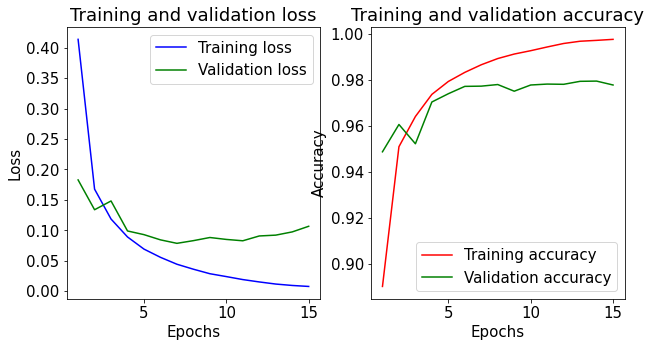

In [74]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Resultados

In [75]:
results2 = network2.evaluate(test_images, test_labels)
print('results loss:', results2[0])
print('results accuracy:', results2[1])

 15/313 [>.............................] - ETA: 1s - loss: 0.0634 - accuracy: 0.9854    

313/313 [==============================] - 1s 4ms/step - loss: 0.0924 - accuracy: 0.9785
results loss: 0.09236416965723038
results accuracy: 0.9785000085830688


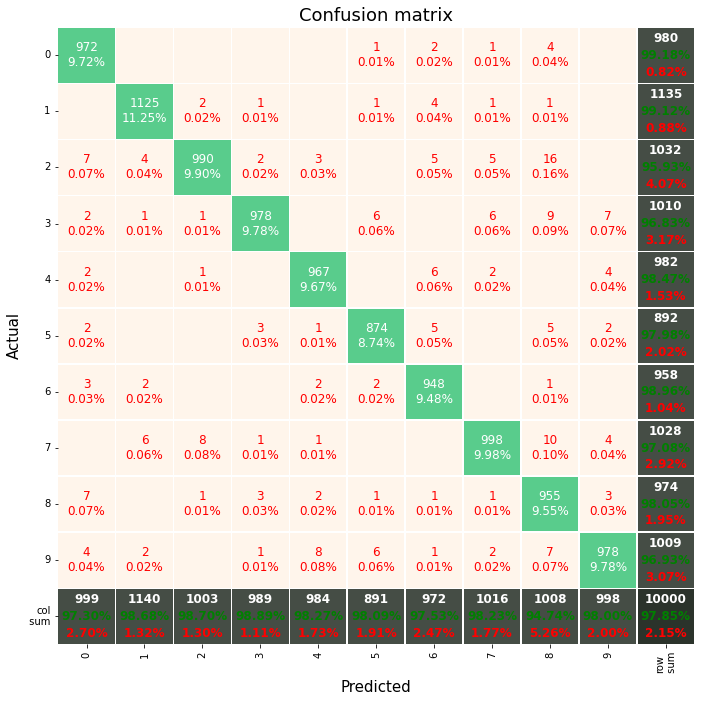

In [76]:
pred2 = network2.predict(test_images)
predictions2 = np.argmax(pred2, 1)

test_labs = np.argmax(test_labels, 1)
conf_matrix2 = ConfusionMatrix(test_labs, predictions2)

# plot confusion matrix
CM2 = conf_matrix2.to_array()
cf2 = DataFrame(CM2)
pretty_plot_confusion_matrix(cf2, annot=True, pred_val_axis='x', figsize=(10,10), fz=12)

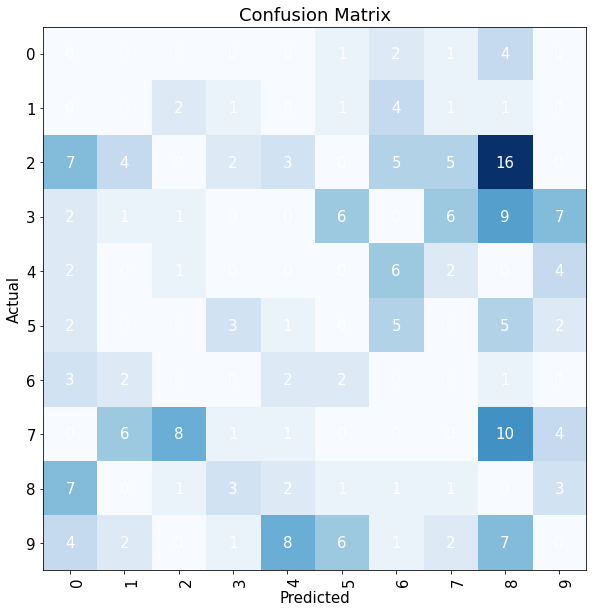

0

In [77]:
# second plot
PlotMatrix(CM2, figsize=(10,10), cmap=plt.cm.Blues, title='Confusion Matrix', fz=15)

---

---